# Train Toxicity Model

This notebook trains a model to detect toxicity in online comments. It uses a CNN architecture for text classification trained on the [Wikipedia Talk Labels: Toxicity dataset](https://figshare.com/articles/Wikipedia_Talk_Labels_Toxicity/4563973) and pre-trained GloVe embeddings which can be found at:
http://nlp.stanford.edu/data/glove.6B.zip
(source page: http://nlp.stanford.edu/projects/glove/).

This model is a modification of [example code](https://github.com/fchollet/keras/blob/master/examples/pretrained_word_embeddings.py) found in the [Keras Github repository](https://github.com/fchollet/keras) and released under an [MIT license](https://github.com/fchollet/keras/blob/master/LICENSE). For further details of this license, find it [online](https://github.com/fchollet/keras/blob/master/LICENSE) or in this repository in the file KERAS_LICENSE. 

## Usage Instructions
(TODO: nthain) - Move to README

Prior to running the notebook, you must:

* Download the [Wikipedia Talk Labels: Toxicity dataset](https://figshare.com/articles/Wikipedia_Talk_Labels_Toxicity/4563973)
* Download pre-trained [GloVe embeddings](http://nlp.stanford.edu/data/glove.6B.zip)
* (optional) To skip the training step, you will need to download a model and tokenizer file. We are looking into the appropriate means for distributing these (sometimes large) files.

In [1]:
from model_tool import ToxModel

HELLO from model_tool


Using TensorFlow backend.


learn rate: 5e-05
seq len: 250
num words: 5000
epochs: 8
dropout: 0.3

embedding dim: 100
batch size: 128



## Load Data

In [2]:
SPLITS = ['train', 'dev', 'test']

wiki = {}
debias = {}
random = {}
for split in SPLITS:
    wiki[split] = '../data/wiki_%s.csv' % split
    debias[split] = '../data/wiki_debias_%s.csv' % split
    random[split] = '../data/wiki_debias_random_%s.csv' % split

## HUNT MODEL VARIANCE

In [17]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import model_tool
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_colwidth', 135)

def hack_score(model, texts, maxlen=1000):
    sequences = model.tokenizer.texts_to_sequences(texts)
    data = pad_sequences(sequences, maxlen=maxlen)
    return model.predict(data)

### hack attempt 1 10-03

trained multiple 5 copies of each model

In [24]:
%%time

import datetime

wiki['name'] = 'orig'
debias['name'] = 'debias'
random['name'] = 'random'

test_results = {}
spooky_models = []

for i in xrange(6):
    for m in [wiki, debias, random]:
        name = 'spooky_{}_v{}'.format(m['name'], i)
        print('training', name, datetime.datetime.now())
        model = ToxModel()
        model.train(m['train'], m['dev'], text_column='comment', label_column='is_toxic', model_name=name)
        spooky_models.append((name, model))

training spooky_orig_v0 2017-10-04 00:21:56.333810
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/3
95692/95692 [==============================] - 585s - loss: 0.1460 - acc: 0.9479 - val_loss: 0.1030 - val_acc: 0.9617
Epoch 2/3
95692/95692 [==============================] - 585s - loss: 0.1003 - acc: 0.9640 - val_loss: 0.1362 - val_acc: 0.9546
Epoch 3/3
95692/95692 [==============================] - 585s - loss: 0.0914 - acc: 0.9678 - val_loss: 0.1176 - val_acc: 0.9645
Model trained!
Saving model...
Model saved!
training spooky_debias_v0 2017-10-04 00:51:37.893455
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/3
99157/99157 [==============================] - 607s - loss: 0.1450 - acc: 0.9489 - val_loss: 0.1290 - val_acc: 0.9571
Epoch 2/

KeyboardInterrupt: 

In [29]:
spooky_models2 = spooky_models[:-1]
spooky_models2

[('spooky_orig_v0', <model_tool.ToxModel instance at 0x7fb4f6ef2e18>),
 ('spooky_debias_v0', <model_tool.ToxModel instance at 0x7fb4cf07c878>),
 ('spooky_random_v0', <model_tool.ToxModel instance at 0x7fb4b93243f8>),
 ('spooky_orig_v1', <model_tool.ToxModel instance at 0x7fb4cbb9fdd0>),
 ('spooky_debias_v1', <model_tool.ToxModel instance at 0x7fb310bbf368>),
 ('spooky_random_v1', <model_tool.ToxModel instance at 0x7fb2e8f48e60>),
 ('spooky_orig_v2', <model_tool.ToxModel instance at 0x7fb2e32b1128>),
 ('spooky_debias_v2', <model_tool.ToxModel instance at 0x7fb2b4d6b3f8>),
 ('spooky_random_v2', <model_tool.ToxModel instance at 0x7fb27cb1e560>),
 ('spooky_orig_v3', <model_tool.ToxModel instance at 0x7fb2648eb560>),
 ('spooky_debias_v3', <model_tool.ToxModel instance at 0x7fb23cd54290>),
 ('spooky_random_v3', <model_tool.ToxModel instance at 0x7fb22496bc20>),
 ('spooky_orig_v4', <model_tool.ToxModel instance at 0x7fb216ce3290>),
 ('spooky_debias_v4', <model_tool.ToxModel instance at 0x7fb1

#### scoring

In [39]:
%%time

test_sets = [pd.read_csv(path) for path in [wiki['test'], debias['test'], random['test']]]

for i, test_set in enumerate(test_sets):
    for (name, model) in spooky_models2:
        print('scoring', i, name, datetime.datetime.now())
        test_results[name] = hack_score(model, test_set['comment'])

scoring 0 spooky_orig_v0 2017-10-04 11:12:12.684036
scoring 0 spooky_debias_v0 2017-10-04 11:13:42.611486
scoring 0 spooky_random_v0 2017-10-04 11:15:38.811669
scoring 0 spooky_orig_v1 2017-10-04 11:17:07.660048
scoring 0 spooky_debias_v1 2017-10-04 11:18:52.076721
scoring 0 spooky_random_v1 2017-10-04 11:20:48.096026
scoring 0 spooky_orig_v2 2017-10-04 11:22:19.801965
scoring 0 spooky_debias_v2 2017-10-04 11:23:49.042078
scoring 0 spooky_random_v2 2017-10-04 11:27:02.968241
scoring 0 spooky_orig_v3 2017-10-04 11:28:33.812361
scoring 0 spooky_debias_v3 2017-10-04 11:30:04.218309
scoring 0 spooky_random_v3 2017-10-04 11:32:04.785935
scoring 0 spooky_orig_v4 2017-10-04 11:33:34.530306
scoring 0 spooky_debias_v4 2017-10-04 11:35:04.777843
scoring 0 spooky_random_v4 2017-10-04 11:38:03.601047
scoring 1 spooky_orig_v0 2017-10-04 11:42:31.448177


KeyboardInterrupt: 

In [41]:
orig_results = [test_results['spooky_orig_v0'], test_results['spooky_orig_v1'], test_results['spooky_orig_v2'],
                test_results['spooky_orig_v3'], test_results['spooky_orig_v4']] 
debias_results = [test_results['spooky_debias_v0'], test_results['spooky_debias_v1'], test_results['spooky_debias_v2'],
                  test_results['spooky_debias_v3'], test_results['spooky_debias_v4']] 
random_results = [test_results['spooky_random_v0'], test_results['spooky_random_v1'], test_results['spooky_random_v2'],
                  test_results['spooky_random_v3'], test_results['spooky_random_v4']] 

#### plotting score histograms

orig scores


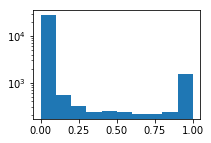

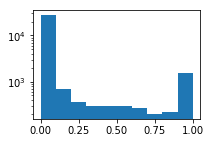

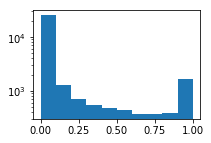

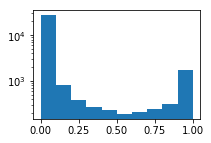

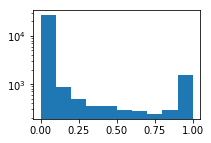

debias scores


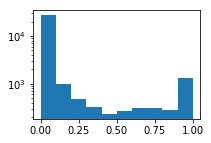

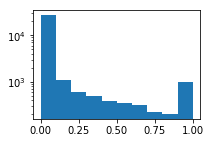

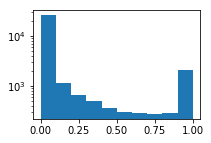

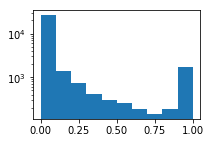

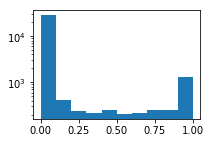

random scores


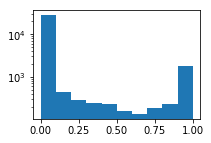

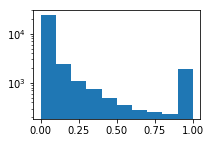

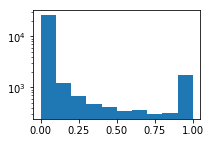

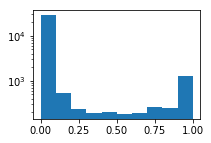

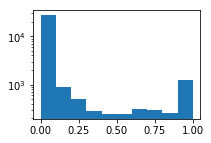

In [147]:
opts = {'log': True, 'normed': False}

print('orig scores')
for scores in orig_results:
    plt.figure(figsize=(3,2))
    plt.hist(scores, **opts)
    plt.show()
    
print('debias scores')
for scores in debias_results:
    plt.figure(figsize=(3,2))
    plt.hist(scores, **opts)
    plt.show()
    
print('random scores')
for scores in random_results:
    plt.figure(figsize=(3,2))
    plt.hist(scores, **opts)
    plt.show()

In [73]:
[model_tool.compute_auc(test_sets[0]['is_toxic'], scores) for scores in orig_results]

[0.96897995365611589,
 0.97703257241710084,
 0.96907637628603738,
 0.97677017808751421,
 0.97493965659039661]

In [74]:
[model_tool.compute_auc(test_sets[0]['is_toxic'], scores) for scores in debias_results]

[0.96566880771696162,
 0.97167217662881655,
 0.97509745977515871,
 0.97394611471504855,
 0.96275374082690013]

In [75]:
[model_tool.compute_auc(test_sets[0]['is_toxic'], scores) for scores in random_results]

[0.96533774663108818,
 0.9758727856095335,
 0.97477515920805546,
 0.97448330699371499,
 0.97095007421906943]

#### looking at max per-example variance

In [82]:
wiki_test_set = test_sets[0]

In [90]:
for i, orig_scores in enumerate(orig_results):
    wiki_test_set['orig' + str(i)] = orig_scores

In [105]:
wiki_test_set['orig_var'] = wiki_test_set[['orig0', 'orig1', 'orig2', 'orig3', 'orig4']].var(axis=1)

In [134]:
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_colwidth', 135)

In [135]:
wiki_test_set.sort_values('orig_var', ascending=False)[['comment', 'is_toxic', 'orig0', 'orig1', 'orig2', 'orig3', 'orig4']]

,comment,is_toxic,orig0,orig1,orig2,orig3,orig4
15279,==supertall fag== fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag fag...,True,1.000,1.000,0.000,1.000,0.000
15351,:I tried googling http://www.google.com/search?hl=nt&lr;=&q;=%22%D1%82%D0%B5%D0%BE%D0%B4%D0%BE%D1%80+%D0%94%D0%BE%D1%81%D1%82%D0%B...,False,0.000,1.000,0.000,1.000,0.000
11334,*** After all the times you have thwarted me... After all the times my plans for world domination were foiled by your meddlesome ...,True,0.000,1.000,0.000,1.000,0.000
18786,== I despise the way you have treated my fellow Christian friend. == male • gay • married • a socialist • a vegetarian • We...,True,0.000,1.000,0.001,1.000,0.003
3696,"June 2006 (UTC) : Faggot 01:07, 19",True,0.000,1.000,0.000,1.000,0.006
27447,"`, 21 June 2013 (UTC) :::Okay ima gey, god hate me brah 22:26`",True,0.000,0.987,0.001,0.992,0.000
3658,:Nazism and religion Nazi mysticism Nazi architecture Category:Nazi physicians Nazi human experimentation Nazism and race Nazi so...,True,0.003,0.055,0.000,0.853,0.985
15197,Bollocks all is bollocks Bollocks all is bollocks Bollocks all is bollocks Bollocks all is bollocks Bollocks all is bollocks Bolloc...,True,0.046,0.967,0.300,1.000,0.999
16996,"{{Infobox Anatomy | Name = Human penis | Latin = penis, penes | GraySubject = 262 | GrayPage = 1247 ...",False,0.000,0.542,0.000,1.000,0.000
4117,PENIS SMACKING WILLY WANKING WILLY WONG,True,1.000,1.000,0.049,1.000,0.970


In [142]:
wiki_test_set.loc[18791].comment

"     U FAT NOOB!!  I'm Samuel Gary Carter and I can't offend myself!!  I didn't add either of those pages  soo something must have hacked into mya ccount  and done i tthere"

### hack 2: more regularization (dropout 0.1 -> 0.3, epochs 3 -> 5)

#### training wiki model only

In [9]:
wiki_train_comments = pd.read_csv(wiki['train'])['comment']
wiki_train_comments.head()

0    This: :One can make an analogy in mathematical...
1    `  :Clarification for you  (and Zundark's righ...
2    `This is such a fun entry.   Devotchka  I once...
3    `   I fixed the link; I also removed ``homeopa...
4    `If they are ``indisputable`` then why does th...
Name: comment, dtype: object

In [16]:
wiki_train_comments.str.len().describe(percentiles=[0.5, .75, .9, 0.95, .99])

count    95692.000000
mean       401.608818
std        598.384488
min          5.000000
50%        211.000000
75%        444.000000
90%        898.000000
95%       1380.000000
99%       3503.270000
max       5900.000000
Name: comment, dtype: float64

In [4]:
%%time

import datetime

print('wiki:', wiki)

hack2_wiki_models = []

for i in xrange(4):
    name = 'hack2_orig_v{}'.format(i)
    print('\n\n ======= training', name, datetime.datetime.now())
    model = ToxModel()
    model.train(wiki['train'], wiki['dev'], text_column='comment', label_column='is_toxic', model_name=name)
    hack2_wiki_models.append((name, model))

wiki: {'test': '../data/wiki_test.csv', 'train': '../data/wiki_train.csv', 'dev': '../data/wiki_dev.csv'}


 ======= training hack2_orig_v0 2017-10-04 13:22:54.821579
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/5
95692/95692 [==============================] - 597s - loss: 0.1486 - acc: 0.9483 - val_loss: 0.1118 - val_acc: 0.9564
Epoch 2/5
95692/95692 [==============================] - 602s - loss: 0.1033 - acc: 0.9634 - val_loss: 0.1340 - val_acc: 0.9615
Epoch 3/5
95692/95692 [==============================] - 603s - loss: 0.0928 - acc: 0.9663 - val_loss: 0.1114 - val_acc: 0.9629
Epoch 4/5
95692/95692 [==============================] - 600s - loss: 0.0866 - acc: 0.9689 - val_loss: 0.1102 - val_acc: 0.9634
Epoch 5/5
95692/95692 [==============================] - 595s - loss: 0.0807 - acc: 0.9711 - val_loss: 0.1448 - val_acc: 0.9628
Model trained!
Saving model

KeyboardInterrupt: 

### hack 3: limit features (max_sequence_length 1000 -> 250)

epochs lowered to 4 to get more runs faster.
dropout still set to 0.3

In [ ]:
%%time

import datetime

print('wiki:', wiki)

hack3_wiki_models = []

for i in xrange(4):
    name = 'hack3_orig_v{}'.format(i)
    print('\n\n ======= training', name, datetime.datetime.now())
    model = ToxModel()
    model.train(wiki['train'], wiki['dev'], text_column='comment', label_column='is_toxic', model_name=name)
    hack3_wiki_models.append((name, model))

wiki: {'test': '../data/wiki_test.csv', 'train': '../data/wiki_train.csv', 'dev': '../data/wiki_dev.csv'}


 ======= training hack3_orig_v0 2017-10-04 15:53:40.278734
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/4
95692/95692 [==============================] - 196s - loss: 0.1495 - acc: 0.9469 - val_loss: 0.1054 - val_acc: 0.9623
Epoch 2/4
95692/95692 [==============================] - 195s - loss: 0.1056 - acc: 0.9629 - val_loss: 0.1054 - val_acc: 0.9634
Epoch 3/4
95692/95692 [==============================] - 196s - loss: 0.0949 - acc: 0.9665 - val_loss: 0.1057 - val_acc: 0.9618
Epoch 4/4
95692/95692 [==============================] - 196s - loss: 0.0866 - acc: 0.9697 - val_loss: 0.1394 - val_acc: 0.9595
Model trained!
Saving model...
Model saved!


 ======= training hack3_orig_v1 2017-10-04 16:07:09.092612
Preparing data...
Data prepared!
Loading embedding

### Hack4: limit num words and sequence length

- num_words: 5000 (was 20k)
- sequence length: 250 (same as hack3, was 1000 originally)
- epochs: 4 (same as hack3)
- dropout: 0.3 (same as hack3)

In [4]:
%%time

import datetime

print('wiki:', wiki)

hack4_wiki_models = []

for i in xrange(4):
    name = 'hack4_orig_v{}'.format(i)
    print('\n\n ======= training', name, datetime.datetime.now())
    model = ToxModel()
    model.train(wiki['train'], wiki['dev'], text_column='comment', label_column='is_toxic', model_name=name)
    hack4_wiki_models.append((name, model))

wiki: {'test': '../data/wiki_test.csv', 'train': '../data/wiki_train.csv', 'dev': '../data/wiki_dev.csv'}


 ======= training hack4_orig_v0 2017-10-04 16:31:43.819996
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/4
95692/95692 [==============================] - 200s - loss: 0.1539 - acc: 0.9476 - val_loss: 0.1175 - val_acc: 0.9594
Epoch 2/4
95692/95692 [==============================] - 199s - loss: 0.1117 - acc: 0.9614 - val_loss: 0.1101 - val_acc: 0.9597
Epoch 3/4
95692/95692 [==============================] - 198s - loss: 0.1028 - acc: 0.9630 - val_loss: 0.1106 - val_acc: 0.9622
Epoch 4/4
95692/95692 [==============================] - 196s - loss: 0.0986 - acc: 0.9656 - val_loss: 0.1472 - val_acc: 0.9612
Model trained!
Saving model...
Model saved!


 ======= training hack4_orig_v1 2017-10-04 16:45:21.894337
Preparing data...
Data prepared!
Loading embedding

KeyboardInterrupt: 

### Hack5: more epochs to track training loss

In [4]:
%%time

import datetime

print('wiki:', wiki)

hack5_wiki_models = []

for i in xrange(4):
    name = 'hack5_orig_v{}'.format(i)
    print('\n\n ======= training', name, datetime.datetime.now())
    model = ToxModel()
    model.train(wiki['train'], wiki['dev'], text_column='comment', label_column='is_toxic', model_name=name)
    hack5_wiki_models.append((name, model))

wiki: {'test': '../data/wiki_test.csv', 'train': '../data/wiki_train.csv', 'dev': '../data/wiki_dev.csv'}


 ======= training hack5_orig_v0 2017-10-04 17:07:59.615156
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/10
95692/95692 [==============================] - 200s - loss: 0.1542 - acc: 0.9458 - val_loss: 0.1316 - val_acc: 0.9543
Epoch 2/10
95692/95692 [==============================] - 199s - loss: 0.1120 - acc: 0.9614 - val_loss: 0.1169 - val_acc: 0.9558
Epoch 3/10
95692/95692 [==============================] - 200s - loss: 0.1046 - acc: 0.9634 - val_loss: 0.1207 - val_acc: 0.9604
Epoch 4/10
95692/95692 [==============================] - 206s - loss: 0.1028 - acc: 0.9652 - val_loss: 0.1270 - val_acc: 0.9609
Epoch 5/10
95692/95692 [==============================] - 205s - loss: 0.1000 - acc: 0.9663 - val_loss: 0.1489 - val_acc: 0.9612
Epoch 6/10
95692/95692

KeyboardInterrupt: 

### hack6: lower learning rate

- seq len: 250
- num words: 5000
- epochs: 8
- dropout: 0.3
- learn rate 0.0001

In [4]:
%%time

import datetime

print('wiki:', wiki)

hack6_wiki_models = []

for i in xrange(4):
    name = 'hack6_orig_v{}'.format(i)
    print('\n\n ======= training', name, datetime.datetime.now())
    model = ToxModel()
    model.train(wiki['train'], wiki['dev'], text_column='comment', label_column='is_toxic', model_name=name)
    hack6_wiki_models.append((name, model))

wiki: {'test': '../data/wiki_test.csv', 'train': '../data/wiki_train.csv', 'dev': '../data/wiki_dev.csv'}


 ======= training hack6_orig_v0 2017-10-04 17:34:20.457466
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/8
95692/95692 [==============================] - 128s - loss: 0.2102 - acc: 0.9262 - val_loss: 0.1549 - val_acc: 0.9433
Epoch 2/8
95692/95692 [==============================] - 123s - loss: 0.1505 - acc: 0.9454 - val_loss: 0.1413 - val_acc: 0.9495
Epoch 3/8
95692/95692 [==============================] - 125s - loss: 0.1327 - acc: 0.9522 - val_loss: 0.1344 - val_acc: 0.9525
Epoch 4/8
95692/95692 [==============================] - 121s - loss: 0.1218 - acc: 0.9560 - val_loss: 0.1261 - val_acc: 0.9543
Epoch 5/8
95692/95692 [==============================] - 120s - loss: 0.1133 - acc: 0.9590 - val_loss: 0.1489 - val_acc: 0.9438
Epoch 6/8
95692/95692 [====

KeyboardInterrupt: 

### hack7: even lower?

In [4]:

%%time

import datetime

print('wiki:', wiki)

hack7_wiki_models = []

for i in xrange(4):
    name = 'hack7_orig_v{}'.format(i)
    print('\n\n ======= training', name, datetime.datetime.now())
    model = ToxModel()
    model.train(wiki['train'], wiki['dev'], text_column='comment', label_column='is_toxic', model_name=name)
    hack7_wiki_models.append((name, model))

wiki: {'test': '../data/wiki_test.csv', 'train': '../data/wiki_train.csv', 'dev': '../data/wiki_dev.csv'}


 ======= training hack7_orig_v0 2017-10-04 18:24:04.990942
Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/8
95692/95692 [==============================] - 119s - loss: 0.2284 - acc: 0.9207 - val_loss: 0.1788 - val_acc: 0.9353
Epoch 2/8
95692/95692 [==============================] - 120s - loss: 0.1618 - acc: 0.9409 - val_loss: 0.1500 - val_acc: 0.9455
Epoch 3/8
95692/95692 [==============================] - 119s - loss: 0.1448 - acc: 0.9471 - val_loss: 0.1396 - val_acc: 0.9487
Epoch 4/8
95692/95692 [==============================] - 120s - loss: 0.1351 - acc: 0.9510 - val_loss: 0.1371 - val_acc: 0.9487
Epoch 5/8
95692/95692 [==============================] - 117s - loss: 0.1267 - acc: 0.9532 - val_loss: 0.1323 - val_acc: 0.9521
Epoch 6/8
95692/95692 [====

#### score

In [5]:
hack7_wiki_models

[('hack7_orig_v0', <model_tool.ToxModel instance at 0x7f08aae863f8>),
 ('hack7_orig_v1', <model_tool.ToxModel instance at 0x7f08a0a1eb90>),
 ('hack7_orig_v2', <model_tool.ToxModel instance at 0x7f087bc36bd8>),
 ('hack7_orig_v3', <model_tool.ToxModel instance at 0x7f07d4d9ebd8>)]

In [12]:
%%time

wiki_test = pd.read_csv(wiki['test'])

for (name, model) in hack7_wiki_models:
    print('scoring', name, datetime.datetime.now())
    wiki_test[name] = hack_score(model, wiki_test['comment'], maxlen=250)

scoring hack7_orig_v0 2017-10-04 19:40:38.211838
scoring hack7_orig_v1 2017-10-04 19:40:57.152998
scoring hack7_orig_v2 2017-10-04 19:41:15.393496
scoring hack7_orig_v3 2017-10-04 19:41:33.708330
CPU times: user 8min 33s, sys: 1min 8s, total: 9min 41s
Wall time: 1min 14s


In [13]:
wiki_test

,rev_id,toxicity,comment,year,logged_in,ns,sample,split,is_toxic,hack7_orig_v0,hack7_orig_v1,hack7_orig_v2,hack7_orig_v3
0,8953.0,0.000000,Elected or Electoral? JHK,2002,False,article,random,test,False,0.039956,0.021583,0.040605,0.061370
1,28959.0,0.200000,Please relate the ozone hole to increases in c...,2002,True,article,random,test,False,0.005407,0.005966,0.003303,0.004158
2,138074.0,0.000000,` I'm not sure if it's properly called ``fi...,2002,True,article,random,test,False,0.007955,0.003299,0.004808,0.003587
3,200664.0,0.000000,Thanks on the info on how to move a page....,2002,True,user,random,test,False,0.000683,0.001605,0.000855,0.000397
4,213105.0,0.000000,"` : I should do that too, I agree, but I've a...",2002,True,user,random,test,False,0.011738,0.012725,0.004290,0.007882
5,258303.0,0.100000,"`Well, I am not trying to pick a fight ) but I...",2002,True,article,random,test,False,0.002009,0.000854,0.000479,0.000610
6,372885.0,0.000000,"` :Thanks, but I don't have that link. I'm usi...",2002,True,user,random,test,False,0.001948,0.001588,0.002655,0.001408
7,427355.0,0.000000,whats so pro-israeli propagandish about ara...,2002,True,user,random,test,False,0.041835,0.069951,0.186034,0.015614
8,452612.0,0.100000,"Oh, I'm sure I could find a copy around somewh...",2002,True,article,random,test,False,0.003086,0.002681,0.008497,0.002031
9,527004.0,0.000000,Is something like Managing_Urban_America g...,2002,True,user,random,test,False,0.015585,0.103575,0.087239,0.021783


#### score distributions

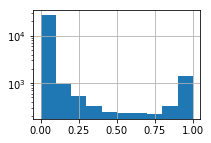

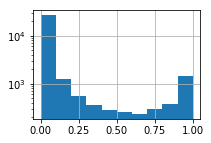

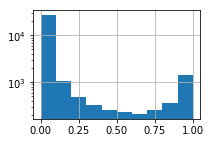

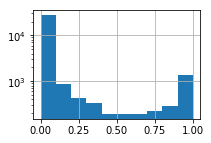

In [16]:
opts = {'log': True, 'normed': False}

for (name, _model) in hack7_wiki_models:
    plt.figure(figsize=(3,2))
    wiki_test[name].hist(**opts)
    plt.show()

#### score variance

In [24]:
wiki_test['score_var'] = wiki_test[[name for (name,_model) in hack7_wiki_models]].var(axis=1)
wiki_test.sort_values('score_var', ascending=False)[['comment', 'is_toxic'] + [name for (name,_model) in hack7_wiki_models]]

,comment,is_toxic,hack7_orig_v0,hack7_orig_v1,hack7_orig_v2,hack7_orig_v3
21737,are you stupid or what????? read the very union text yourself!!!! it is clearly states that union is between TWO NATIONS!!!!!!! h...,True,0.844,0.137,0.770,0.038
16427,"== edits to Jimbo's user page == User:Jimbo Wales is not your sock puppet, and please do not go around like an April Fool. Thank...",False,0.876,0.047,0.084,0.025
13230,"==are u stil a aids carrier?== hey amor, I was wondering if you still have HIV? welp, lemme know",True,0.344,0.885,0.838,0.052
24349,btw mark arsten is a son of a bitch his cock is placed in a girls mouth Hey guys I love chicken rice=)Hey guys I love chicken ric...,True,0.643,0.935,0.008,0.729
12629,== yo == can u stop being so fkn annoying my info on the a milli id right,True,0.082,0.840,0.723,0.138
17413,BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS BALLS...,True,0.912,0.185,0.443,0.022
3412,Check this out dumb Mexican: http://www.ripoffreport.com/reports/ripoff193659.htm,False,0.090,0.814,0.491,0.006
7192,hello hw r u wot u been upto,False,0.007,0.657,0.069,0.703
8603,==Louielim2007== I am suspecting louielim2007 as a sock puppet of jorbyma2007. He is currenty vandalising the Yuri Gagarin page.,False,0.410,0.088,0.877,0.114
23917,"thanks for watching wiki raid threads and ruining fun, dick faggot thanks for watching wiki raid threads and ruining fun, dick fagg...",True,0.960,0.926,0.538,0.186


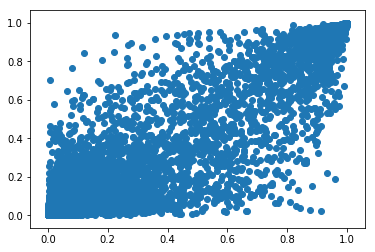

In [28]:
plt.scatter(wiki_test.hack7_orig_v0, wiki_test.hack7_orig_v3)

## Train Models

### Wikipedia Model

In [4]:
%%time
MODEL_NAME = 'cnn_wiki_tox_v3'
wiki_model = ToxModel()
wiki_model.train(wiki['train'], wiki['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = MODEL_NAME)

Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 95692 samples, validate on 32128 samples
Epoch 1/3
95692/95692 [==============================] - 596s - loss: 0.1471 - acc: 0.9477 - val_loss: 0.1052 - val_acc: 0.9615
Epoch 2/3
95692/95692 [==============================] - 673s - loss: 0.1017 - acc: 0.9637 - val_loss: 0.0991 - val_acc: 0.9635
Epoch 3/3
95692/95692 [==============================] - 665s - loss: 0.0904 - acc: 0.9673 - val_loss: 0.1160 - val_acc: 0.9640
Model trained!
Saving model...
Model saved!
CPU times: user 4h 51min 12s, sys: 18min, total: 5h 9min 12s
Wall time: 32min 39s


In [87]:
model_tool.compute_auc(wiki_test_set['is_toxic'], wiki_test_set['blahtest'])

0.96897995365611589

In [10]:
%%time
MODEL_NAME = 'cnn_debias_tox_v3'
debias_model = ToxModel()
debias_model.train(debias['train'], debias['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = MODEL_NAME)

Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/3
99157/99157 [==============================] - 689s - loss: 0.1433 - acc: 0.9489 - val_loss: 0.1220 - val_acc: 0.9584
Epoch 2/3
99157/99157 [==============================] - 698s - loss: 0.0991 - acc: 0.9641 - val_loss: 0.0988 - val_acc: 0.9650
Epoch 3/3
99157/99157 [==============================] - 698s - loss: 0.0880 - acc: 0.9678 - val_loss: 0.1419 - val_acc: 0.9504
Model trained!
Saving model...
Model saved!
CPU times: user 4h 59min 1s, sys: 17min 33s, total: 5h 16min 34s
Wall time: 35min 10s


In [11]:
debias_model.prep_data_and_score(debias['test'], text_column = 'comment', label_column = 'is_toxic')

0.97595644478981225

In [8]:
#TODOOOOOOOOOOOOOOOOOOOOOO
MODEL_NAME = 'cnn_debias_random_tox_v3'
debias_random_model = ToxModel()
debias_random_model.train(random['train'], random['dev'], text_column = 'comment', label_column = 'is_toxic', model_name = MODEL_NAME)

Preparing data...
Data prepared!
Loading embeddings...
Embeddings loaded!
Building model graph...
Training model...
Train on 99157 samples, validate on 33283 samples
Epoch 1/3
99157/99157 [==============================] - 657s - loss: 0.1453 - acc: 0.9485 - val_loss: 0.1178 - val_acc: 0.9588
Epoch 2/3
99157/99157 [==============================] - 695s - loss: 0.0997 - acc: 0.9646 - val_loss: 0.1042 - val_acc: 0.9655
Epoch 3/3
99157/99157 [==============================] - 695s - loss: 0.0898 - acc: 0.9680 - val_loss: 0.0953 - val_acc: 0.9657
Model trained!
Saving model...
Model saved!


In [9]:
debias_random_model.prep_data_and_score(random['test'], text_column = 'comment', label_column = 'is_toxic')

0.97641284855407495